In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Dataset
df = pd.read_csv("G:\Python Projects\Data Science Projects\Cars Data Analysis and Visualization\Automobile.csv")

# DATA WRANGLING

## Univariate Analysis of columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.shape

(398, 9)

### displacement column

<Axes: ylabel='displacement'>

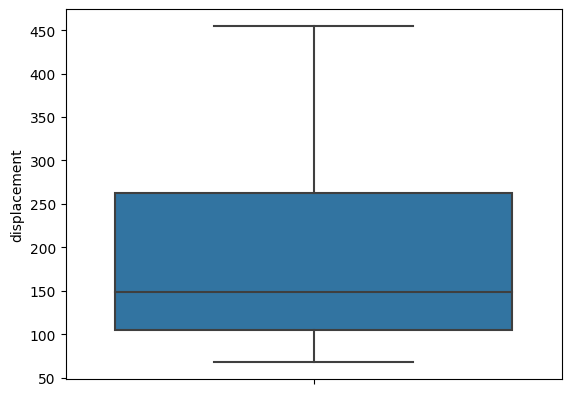

In [6]:
# displacement column consists of many maximum values and outliers and needs to be adjusted/cleared
sns.boxplot(y=df["displacement"])

In [7]:
# 101 max values detected
len(df[df["displacement"]>260])

101

In [8]:
# 98 outliers greater than 300 displacement detected
len(df[df["displacement"]>300])

98

In [9]:
# 37 max values greater than 350 displacement detected
len(df[df["displacement"]>350])

37

### horsepower column 

<Axes: ylabel='horsepower'>

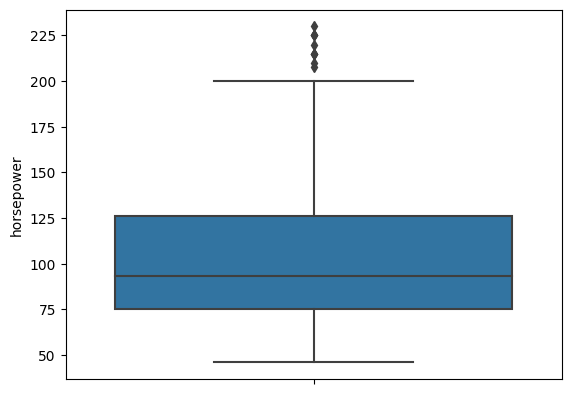

In [10]:
# horsepower column consists of outliers and needs to be adjusted
sns.boxplot(y=df["horsepower"])

In [11]:
# Maximumly 8 outliers are detected in the horsepower column
len(df[df["horsepower"]>210])

8

In [12]:
# Test
df.sample(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
324,datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan
153,chevrolet nova,18.0,6,250.0,105.0,3459,16.0,75,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
39,pontiac catalina brougham,14.0,8,400.0,175.0,4464,11.5,71,usa
45,amc hornet sportabout (sw),18.0,6,258.0,110.0,2962,13.5,71,usa
184,capri ii,25.0,4,140.0,92.0,2572,14.9,76,usa
257,amc concord,19.4,6,232.0,90.0,3210,17.2,78,usa
270,toyota celica gt liftback,21.1,4,134.0,95.0,2515,14.8,78,japan
17,ford maverick,21.0,6,200.0,85.0,2587,16.0,70,usa
252,pontiac phoenix lj,19.2,6,231.0,105.0,3535,19.2,78,usa


In [13]:
# horsepower contains 6 missing values
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [14]:
# Replacing missing values with 0
df["horsepower"] = df["horsepower"].fillna(0)

In [15]:
# Test
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [16]:
# No duplicated values found in the whole dataset
df.duplicated().sum()

0

# EXPLORATORY DATA ANALYSIS (EDA)

## Univariate Analysis

### name column

In [17]:
# Everythings normal
df["name"].describe()

count            398
unique           305
top       ford pinto
freq               6
Name: name, dtype: object

In [18]:
# Everythings normal
df["name"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: name
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


### mpg column

In [19]:
# Max is a little bit highter
df["mpg"].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Text(0.5, 1.0, 'MPG')

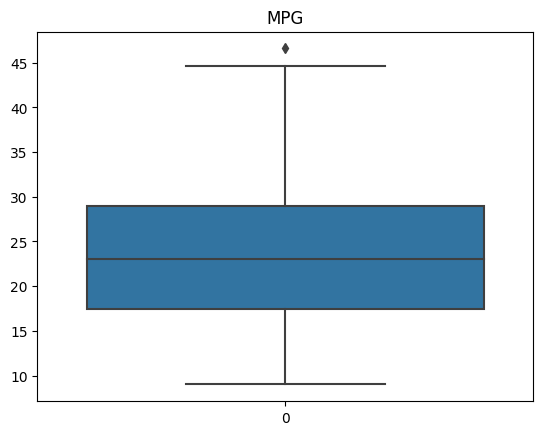

In [20]:
# 1 outlier detected but the remaining data seems normal
sns.boxplot(df["mpg"])
plt.title("MPG")

In [21]:
# float64 is a very high float datatype and needs to be converted to lower float datatype to save memory
df["mpg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [22]:
# Conversion from float64 to float32 which saved space
df["mpg"] = df["mpg"].astype("float32")

In [23]:
# Test
df["mpg"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: mpg
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float32
dtypes: float32(1)
memory usage: 1.7 KB


<Axes: ylabel='Frequency'>

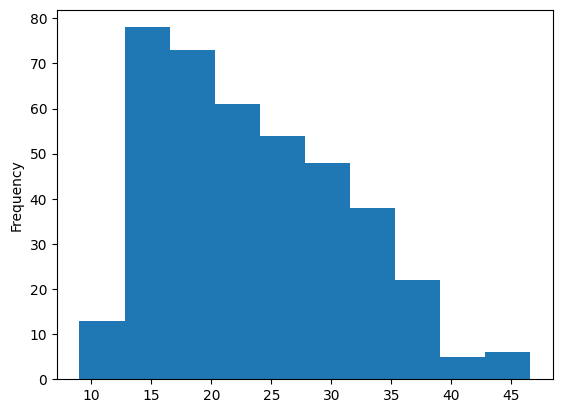

In [24]:
# Almost normally distributed
df["mpg"].plot(kind="hist")

In [25]:
# Almost normally distributed data
df["mpg"].skew()

0.4570666

### cylinders column

In [26]:
# int64 is a very high float datatype and needs to be converted to lower integer datatype to save memory
df["cylinders"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: cylinders
Non-Null Count  Dtype
--------------  -----
398 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [27]:
# Conversion from int64 to int16 which saved 2kb space
df["cylinders"] = df["cylinders"].astype("int16")

In [28]:
# Test
df["cylinders"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: cylinders
Non-Null Count  Dtype
--------------  -----
398 non-null    int16
dtypes: int16(1)
memory usage: 928.0 bytes


In [29]:
# Seems normal
df["cylinders"].describe()

count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

<Axes: ylabel='Frequency'>

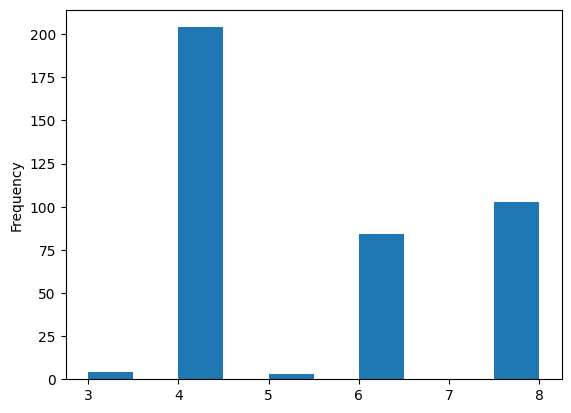

In [30]:
# Almost normal data
df["cylinders"].plot(kind="hist")

In [31]:
# Almost normally distributed data
df["cylinders"].skew()

0.5269215453528939

### displacement column

In [32]:
# Contains many max values
df["displacement"].describe()

count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: displacement, dtype: float64

<Axes: ylabel='Frequency'>

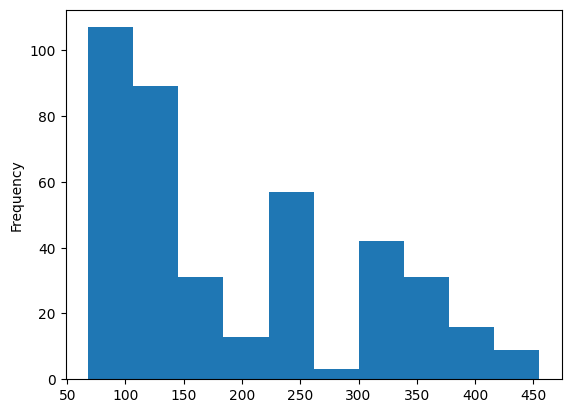

In [33]:
# Almost normally distributed data
df["displacement"].plot(kind="hist")

In [34]:
# Almost normally distributed data
df["displacement"].skew()

0.7196451643005952

<Axes: >

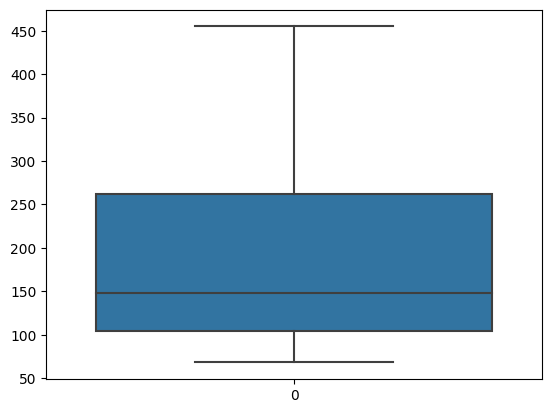

In [35]:
# No outliers but contains many max values
sns.boxplot(df["displacement"])

In [36]:
# float64 is a very high float datatype and needs to be converted to lower float datatype to save memory
df["displacement"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: displacement
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [37]:
# Conversion from float64 to float32 saved memory
df["displacement"] = df["displacement"].astype('float32')

In [38]:
# Test
df["displacement"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: displacement
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float32
dtypes: float32(1)
memory usage: 1.7 KB


In [39]:
# Seems normal
df["horsepower"].describe()

count    398.000000
mean     102.894472
std       40.269544
min        0.000000
25%       75.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

<Axes: ylabel='Frequency'>

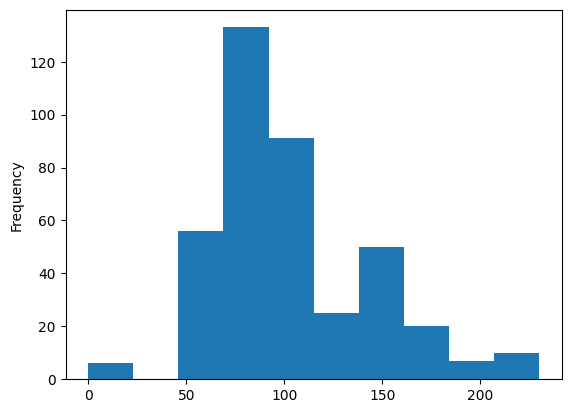

In [40]:
# Almost normally distributed
df["horsepower"].plot(kind="hist")

In [41]:
# Almost normally distributed data
df["horsepower"].skew()

0.7878893133920739

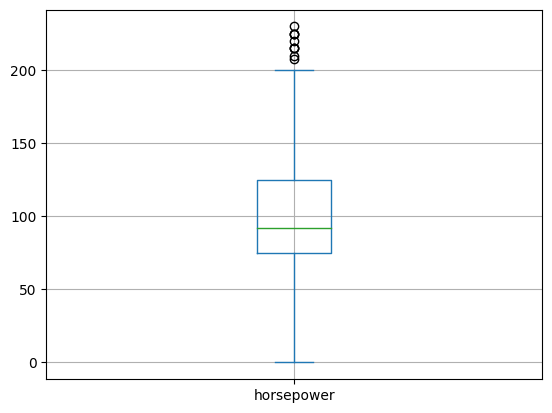

In [42]:
# Contains outliers
df["horsepower"].plot(kind="box")
plt.grid()

In [43]:
# 8 outliers in the horsepower column
df[df["horsepower"]>210]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa
25,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
94,chrysler new yorker brougham,13.0,8,440.0,215.0,4735,11.0,73,usa
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa
116,pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,usa


In [44]:
# float64 is a very high float datatype and needs to be converted to lower float datatype to save memory
df["horsepower"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [45]:
# Conversion from float64 to float32 saved memory
df["horsepower"] = df["horsepower"].astype("float32")

In [46]:
# Test
df["horsepower"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float32
dtypes: float32(1)
memory usage: 1.7 KB


### weight column

In [47]:
# Everythings normal
df["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

<Axes: ylabel='Frequency'>

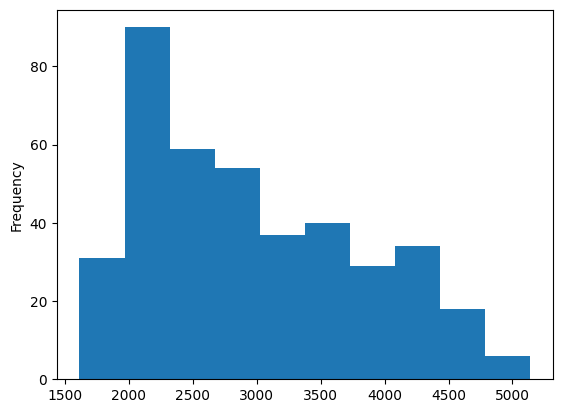

In [48]:
# Almost normally distributed
df["weight"].plot(kind="hist")

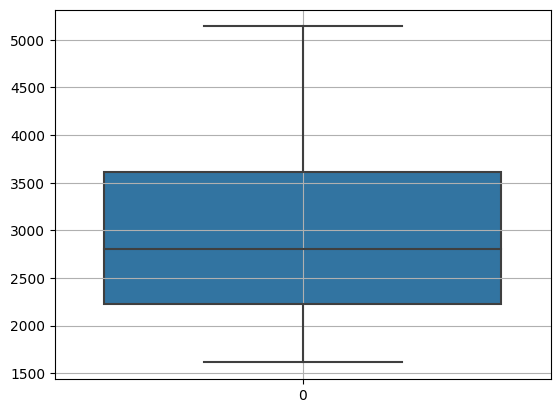

In [49]:
# No outlier detected
sns.boxplot(df["weight"])
plt.grid()

In [50]:
# Almost normally distributed
df["weight"].skew()

0.5310625125994629

In [51]:
# int64 is a very high integer datatype and needs to be converted to lower integer datatype to save memory
df["weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: weight
Non-Null Count  Dtype
--------------  -----
398 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [52]:
# Conversion from int64 to int16 saved 2kb memory
df["weight"] = df["weight"].astype("int16")

In [53]:
# Test
df["weight"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: weight
Non-Null Count  Dtype
--------------  -----
398 non-null    int16
dtypes: int16(1)
memory usage: 928.0 bytes


### acceleration column

In [54]:
# Perfectly normal distribution
df["acceleration"].describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

<Axes: ylabel='Frequency'>

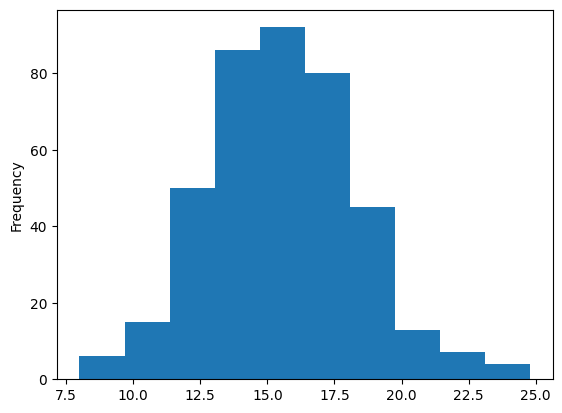

In [55]:
# Perfectly normal distribution
df["acceleration"].plot(kind="hist")

<Axes: >

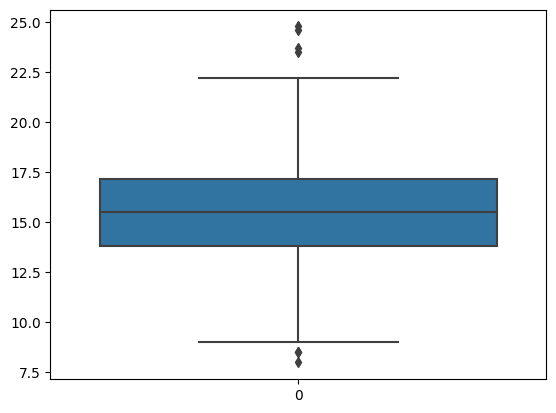

In [56]:
# Contains some outliers but can be ignored or if want to remove then can be removed
sns.boxplot(df["acceleration"])

In [57]:
# Perfectly normal distribution
df["acceleration"].skew()

0.27877684462588986

In [58]:
# float64 is a very high float datatype and needs to be converted to lower float datatype to save memory
df["acceleration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: acceleration
Non-Null Count  Dtype  
--------------  -----  
398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [59]:
# Conversion from float64 to float32 which saved memory
df["acceleration"]= df["acceleration"].astype("int32")

In [60]:
# Test
df["acceleration"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: acceleration
Non-Null Count  Dtype
--------------  -----
398 non-null    int32
dtypes: int32(1)
memory usage: 1.7 KB


### model_year column

In [61]:
# Perfectly normal distribution
df["model_year"].describe()

count    398.000000
mean      76.010050
std        3.697627
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: model_year, dtype: float64

<Axes: ylabel='Frequency'>

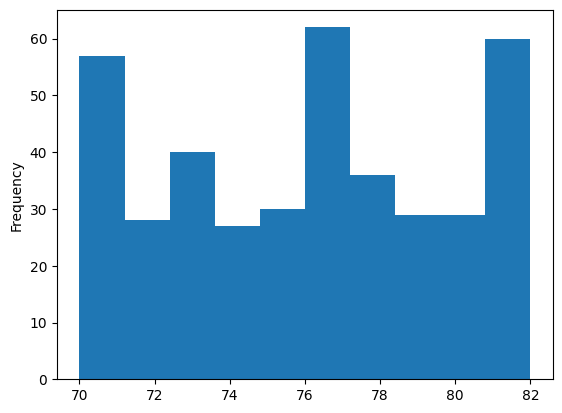

In [62]:
# Perfectly normal distribution
df["model_year"].plot(kind="hist")

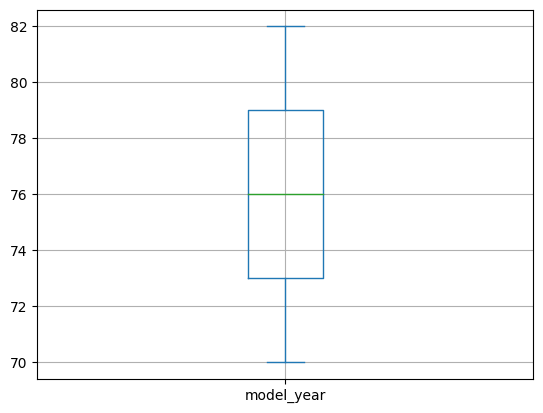

In [63]:
# Perfectly normal distribution
df["model_year"].plot(kind="box")
plt.grid()

In [64]:
# Perfectly normal distribution
df["model_year"].skew()

0.01153459401509278

In [65]:
# int64 is a very high integer datatype and needs to be converted to lower integer datatype to save memory
df["model_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: model_year
Non-Null Count  Dtype
--------------  -----
398 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [66]:
# Conversion from int64 to int16 saved 2kb memory
df["model_year"] = df["model_year"].astype("int16")

In [67]:
# Test
df["model_year"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: model_year
Non-Null Count  Dtype
--------------  -----
398 non-null    int16
dtypes: int16(1)
memory usage: 928.0 bytes


### origin column

In [68]:
# USA is the top category in the origin column
df["origin"].describe()

count     398
unique      3
top       usa
freq      249
Name: origin, dtype: object

In [69]:
# Pure categorical column
df["origin"].str.isdigit().sum()

0

In [70]:
# Values of the 3 categories
df["origin"].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

<Axes: xlabel='origin'>

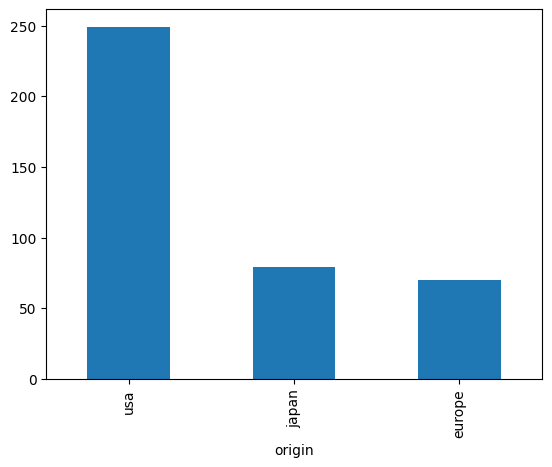

In [71]:
# Visualization of values of the 3 categorie using bar chart
# Top 3 regions
df["origin"].value_counts().plot(kind="bar")

In [72]:
# No missing value found in origin column
df["origin"].isnull().sum()

0

In [73]:
# Object datatype occupies more space than category datatype so we have to convert it into category datatype
df["origin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: origin
Non-Null Count  Dtype 
--------------  ----- 
398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [74]:
# Conversion from object dtype to category dtype which saved upto 2kb space
df["origin"] = df["origin"].astype("category")

In [75]:
# Test
df["origin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: origin
Non-Null Count  Dtype   
--------------  -----   
398 non-null    category
dtypes: category(1)
memory usage: 662.0 bytes


####  Question: Which region is with the most cars? USA is the region with most cars. 

<Axes: ylabel='count'>

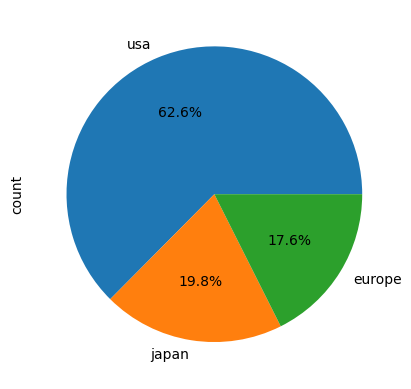

In [76]:
# Visualization of values of the 3 categorie using pie chart
df["origin"].value_counts().plot(kind="pie",autopct="%0.1f%%")

## Bivariate Data Analysis ( Analysis of two columns )

In [77]:
# Test
df.sample(10)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
217,buick opel isuzu deluxe,30.000000,4,111.0,80.0,2155,14,77,usa
23,bmw 2002,26.000000,4,121.0,113.0,2234,12,70,europe
82,toyouta corona mark ii (sw),23.000000,4,120.0,97.0,2506,14,72,japan
207,volvo 245,20.000000,4,130.0,102.0,3150,15,76,europe
322,mazda glc,46.599998,4,86.0,65.0,2110,17,80,japan
380,nissan stanza xe,36.000000,4,120.0,88.0,2160,14,82,japan
270,toyota celica gt liftback,21.100000,4,134.0,95.0,2515,14,78,japan
212,cadillac seville,16.500000,8,350.0,180.0,4380,12,76,usa
316,dodge aspen,19.100000,6,225.0,90.0,3381,18,80,usa
232,ford thunderbird,16.000000,8,351.0,149.0,4335,14,77,usa


### Bivariate Analysis of name column with other columns

#### Question: Find the top three cars with highest milage per gallon? 
#### Mazda GLC, Honda Civic 1500 gl and V W Rabbit c (Diesel) are top cars with highest milage per gallon.

<Axes: xlabel='name'>

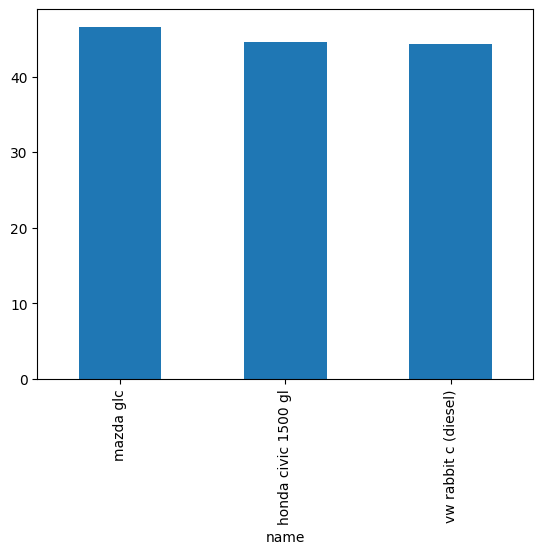

In [78]:
# Top 3 names with highest milage per gallon (mpg)
df.groupby("name")["mpg"].max().sort_values(ascending=False).head(3).plot(kind="bar")

<Axes: xlabel='name'>

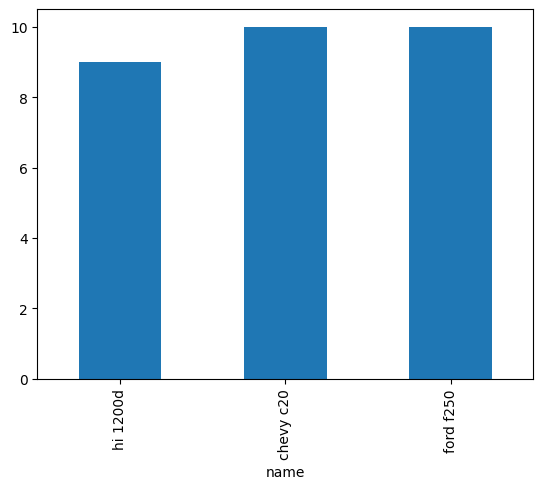

In [79]:
# Top 3 cars with lowest milage per gallon (mpg)
df.groupby("name")["mpg"].min().sort_values().head(3).plot(kind="bar")

In [80]:
# Top 3 cars with lowest milage per gallon (mpg)
df.groupby("name")["mpg"].min().sort_values().head(3)

name
hi 1200d      9.0
chevy c20    10.0
ford f250    10.0
Name: mpg, dtype: float32

In [81]:
# Top 10 cars with 8 cylinders
df.groupby("name")["cylinders"].max().sort_values(ascending=False).head(10)

name
amc ambassador brougham           8
chrysler new yorker brougham      8
dodge coronet custom (sw)         8
dodge coronet custom              8
dodge coronet brougham            8
plymouth satellite custom (sw)    8
plymouth satellite                8
dodge challenger se               8
plymouth grand fury               8
plymouth fury iii                 8
Name: cylinders, dtype: int16

#### Question: Find top 10 cars with most cylinders?
#### See the Visualizatoin to find answer for this question.

<Axes: xlabel='name'>

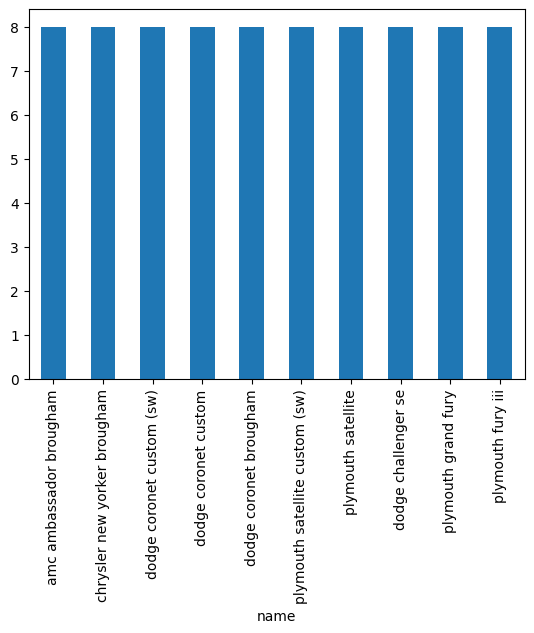

In [82]:
# Top 10 cars with 8 cylinders
df.groupby("name")["cylinders"].max().sort_values(ascending=False).head(10).plot(kind="bar")

#### Question: Find cars with minimum cylinders?
#### See the Visualization to find answer for this question.

<Axes: xlabel='name'>

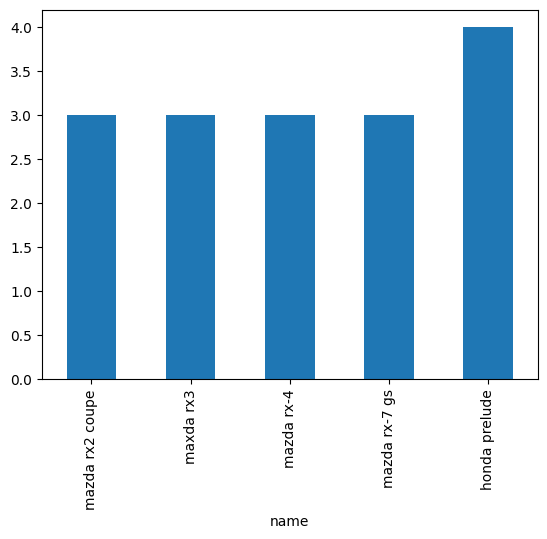

In [83]:
# 3 Cars with minimum cylinders/3 cylinders
df.groupby("name")["cylinders"].min().sort_values().head(5).plot(kind="bar")

#### Question: Find top 5 cars with average cylinders?
#### See Visualization

<Axes: xlabel='name'>

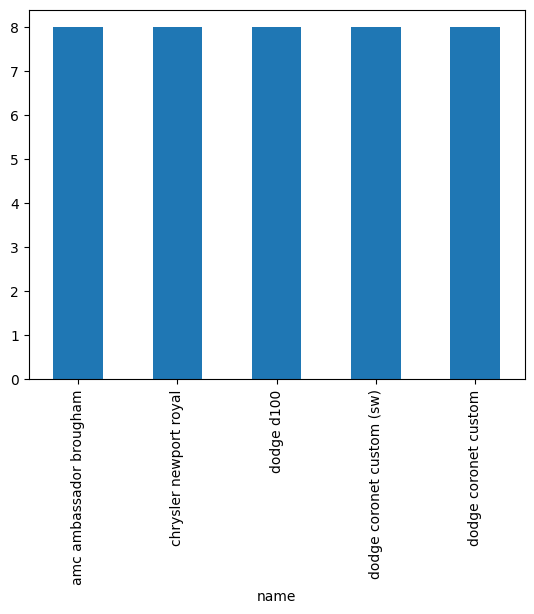

In [84]:
# top 5 Cars with average cylinders
df.groupby("name")["cylinders"].mean().sort_values(ascending=False).head(5).plot(kind="bar")

#### Question: Find cars with highest displacement rate?
#### See the Visualization

<Axes: xlabel='name'>

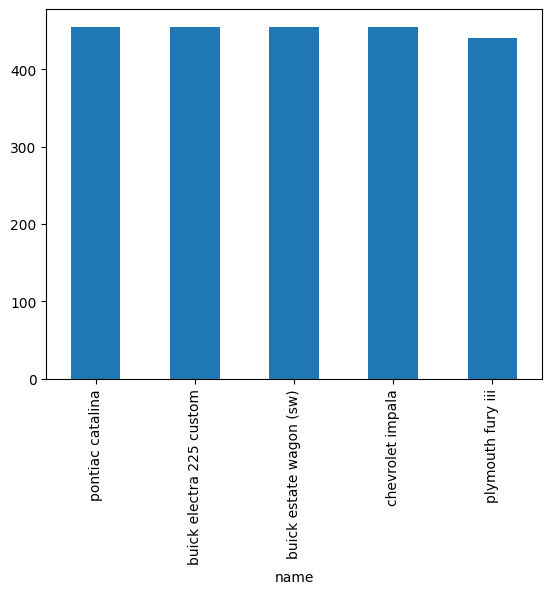

In [85]:
# Cars with highest displacement rate
df.groupby("name")["displacement"].max().sort_values(ascending=False).head(5).plot(kind="bar")

#### Question: Find cars with lowest displacement rate?
#### See the Visualization

<Axes: xlabel='name'>

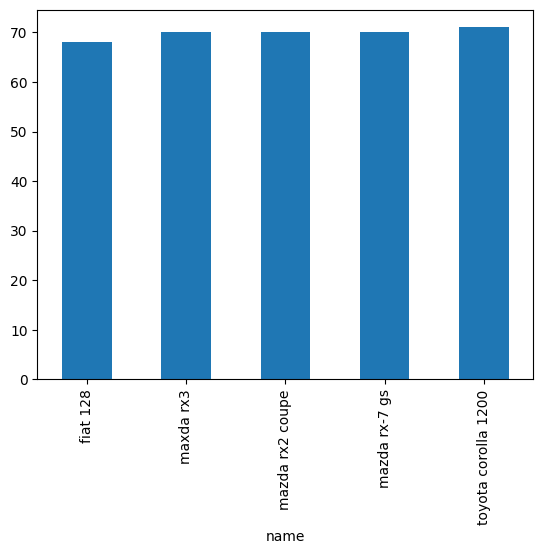

In [86]:
# Cars with lowest displacement rate
df.groupby("name")["displacement"].min().sort_values().head(5).plot(kind="bar")

#### Question: Find top 5 cars with average displacement rate?
#### See Visualization

<Axes: xlabel='name'>

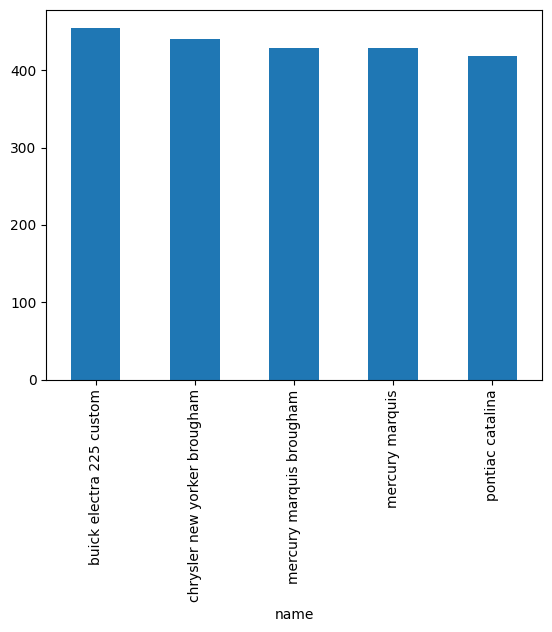

In [87]:
# Cars with average displacement rate
df.groupby("name")["displacement"].mean().sort_values(ascending=False).head(5).plot(kind="bar")

#### Question: Find top 5 cars with highest horse power?
#### See Visualization

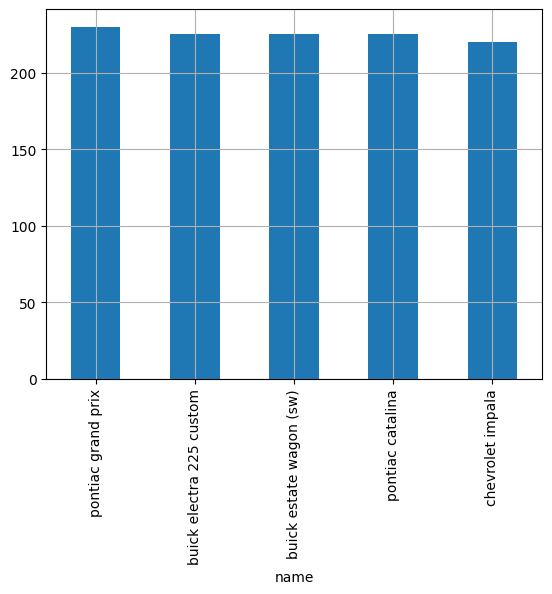

In [88]:
# Top 5 Cars with maximum horsepwers
df.groupby("name")["horsepower"].max().sort_values(ascending=False).head(5).plot(kind="bar")
plt.grid()

#### Question: Find top 5 cars with average horsepower?
#### See the Visualization

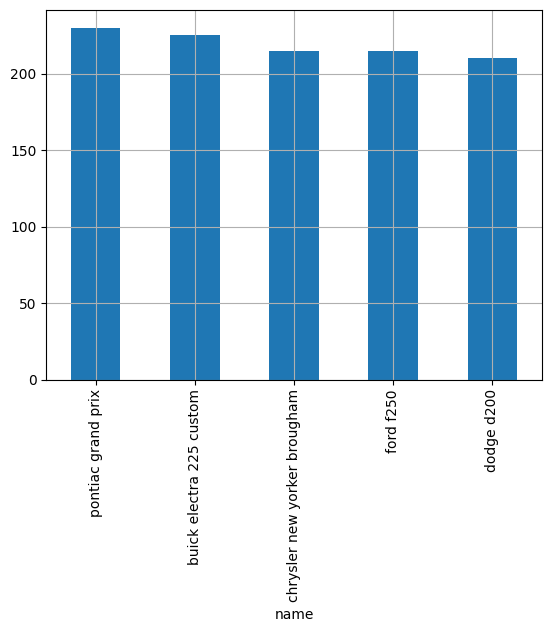

In [89]:
# Top 5 Cars with average horsepwers
df.groupby("name")["horsepower"].mean().sort_values(ascending=False).head(5).plot(kind="bar")
plt.grid()

#### Question: Find top 5 cars with minimum/lowest horsepower?
#### See Visualization. Since there were missing values in horsepower column so i replaced them with 0 therefore shows zero.

<Axes: xlabel='name'>

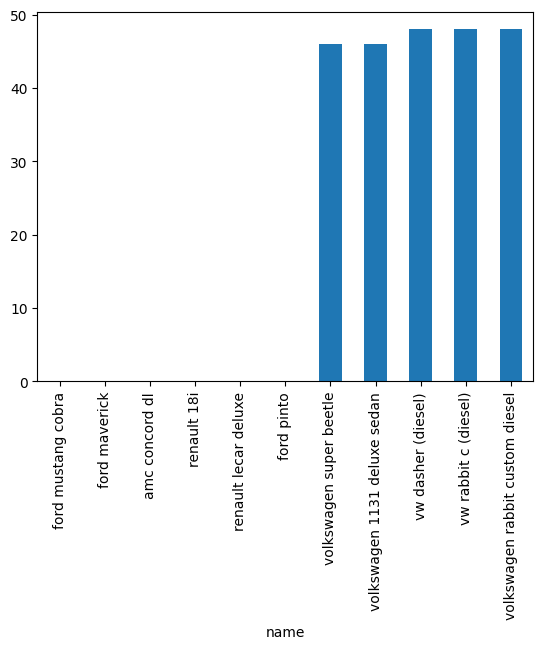

In [90]:
# Top 5 Cars with minimum/lowest horsepwers
df.groupby("name")["horsepower"].min().sort_values().head(11).plot(kind="bar")

#### Question: Find top 5 cars with highest piston weight?
#### See Visualization

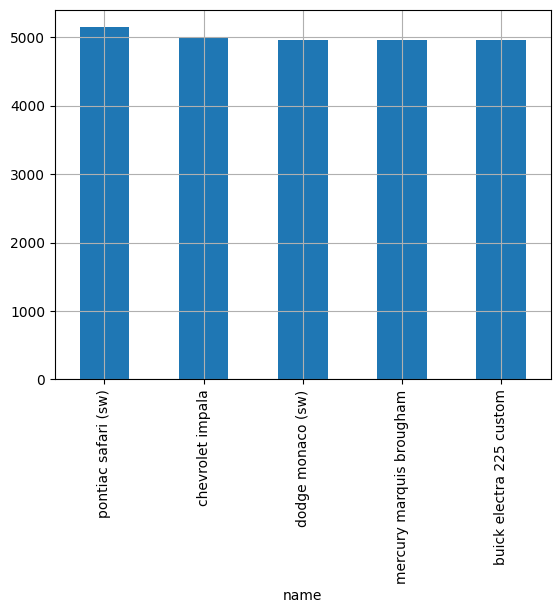

In [91]:
# Top 5 Cars with highest piston weight
df.groupby("name")["weight"].max().sort_values(ascending=False).head(5).plot(kind="bar")
plt.grid()

#### Question: Find top 5 cars with average weight of piston?
#### See the Visualization

<Axes: xlabel='name'>

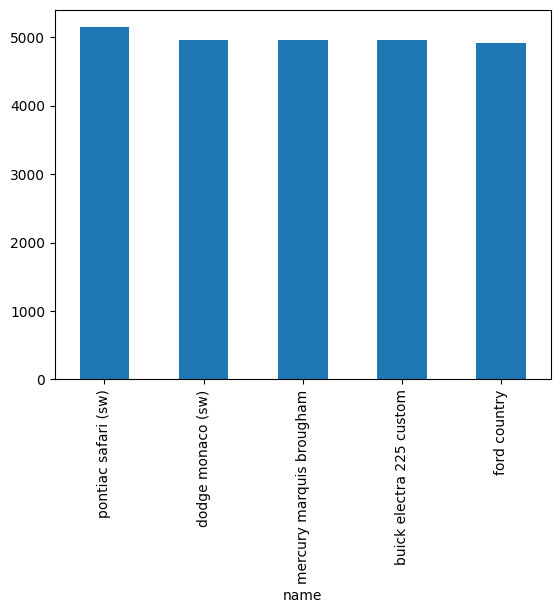

In [92]:
# Top 5 Cars with average piston weight
df.groupby("name")["weight"].mean().sort_values(ascending=False).head(5).plot(kind="bar")

#### Question: Find top 5 cars with lowest/minimum weight of piston?
#### See the Visualization

<Axes: xlabel='name'>

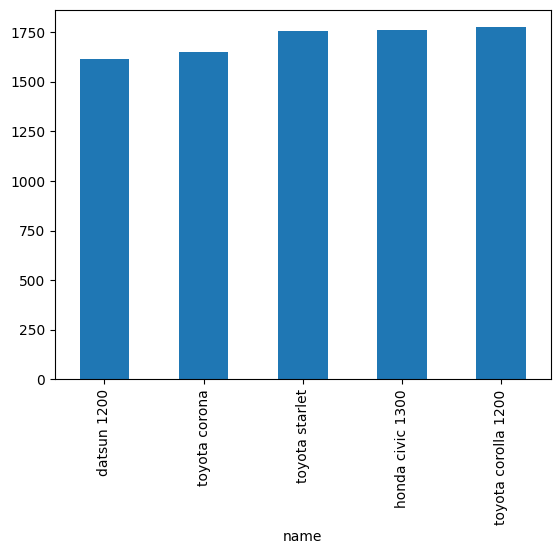

In [93]:
# Top 5 Cars with minimum/lowest piston weight
df.groupby("name")["weight"].min().sort_values().head(5).plot(kind="bar")

#### Question: Find top 5 cars with highest/maximum Acceleration 
#### See Visualization

<Axes: xlabel='name'>

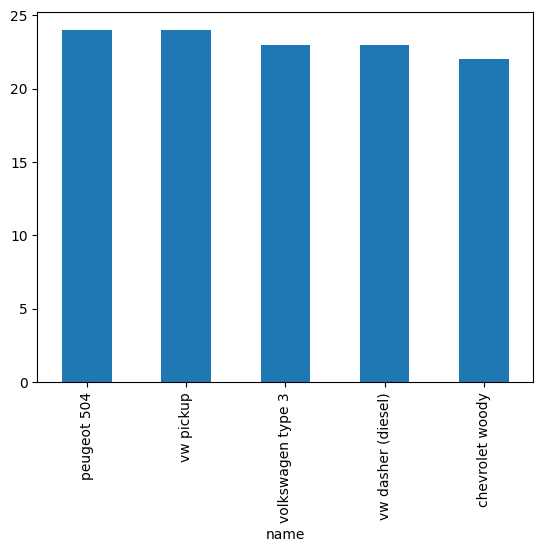

In [94]:
# Top 5 Cars with average piston weight
df.groupby("name")["acceleration"].max().sort_values(ascending=False).head(5).plot(kind="bar")

#### Question: Find top 5 cars with average acceleration?
#### See Visualization

<Axes: xlabel='name'>

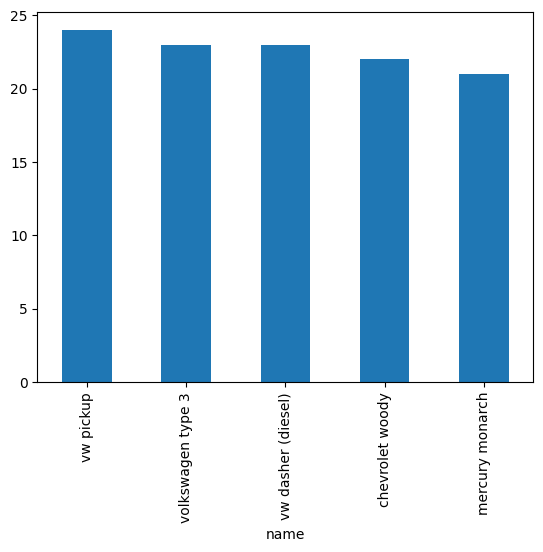

In [95]:
# Top 5 Cars with average piston weight
df.groupby("name")["acceleration"].mean().sort_values(ascending=False).head(5).plot(kind="bar")

In [96]:
df.groupby("name")["acceleration"].mean().sort_values(ascending=False)

name
vw pickup                24.0
volkswagen type 3        23.0
vw dasher (diesel)       23.0
chevrolet woody          22.0
mercury monarch          21.0
                         ... 
dodge challenger se      10.0
pontiac grand prix        9.0
chevrolet monte carlo     9.0
amc ambassador dpl        8.0
plymouth 'cuda 340        8.0
Name: acceleration, Length: 305, dtype: float64

#### Question: Find top 5 cars with minimum/lowest acceleration?
#### See Visualization

<Axes: xlabel='name'>

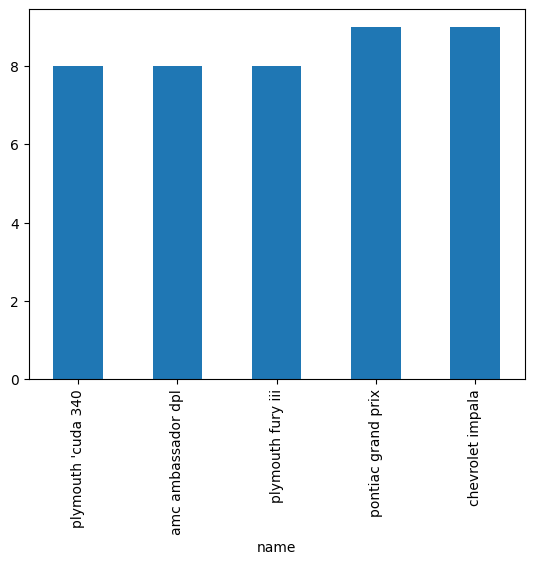

In [97]:
# Top 5 Cars with minimum acceleration
df.groupby("name")["acceleration"].min().sort_values().head(5).plot(kind="bar")

In [98]:
# Number of unique value in the model_year column
df["model_year"].nunique()

13

In [99]:
# Nothing important with name and model_year analysis
df.groupby("name")["model_year"].max().sort_values(ascending=False).head(5)

name
honda civic (auto)            82
chevrolet cavalier            82
pontiac phoenix               82
mazda glc custom              82
pontiac j2000 se hatchback    82
Name: model_year, dtype: int16

### Bivariate Data Analysis of mpg column with other columns 

#### Question: Find miles per gallon according to cylinders?
#### See Visualization, it shows that less cylinders causes more miles per gallon.

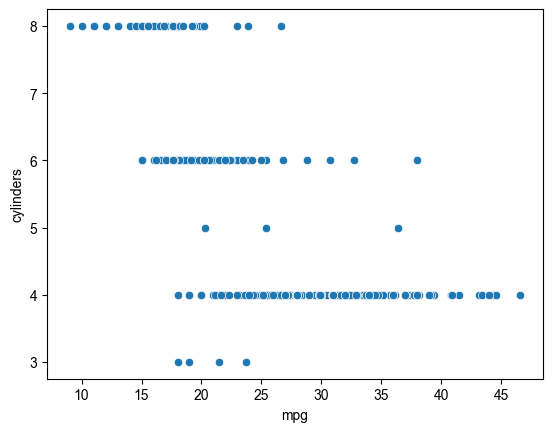

In [100]:
# miles per gallon according to cylinders
sns.scatterplot(data=df, x="mpg", y="cylinders")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find mpg according to displacement?
#### The Visualizatoin shows that increasing miles per gallon decreases displacement

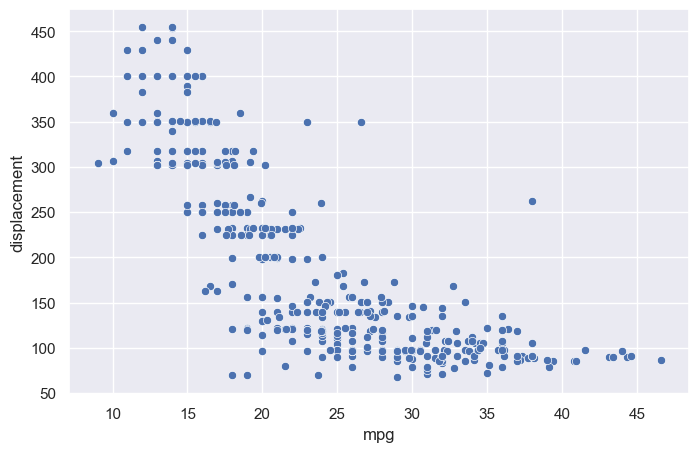

In [101]:
# miles per gallon according to displacement
sns.scatterplot(data=df, x="mpg", y="displacement")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find relation of mpg  with horse power?
#### Visualization shows that horsepower and mpg have an average relation with each other.

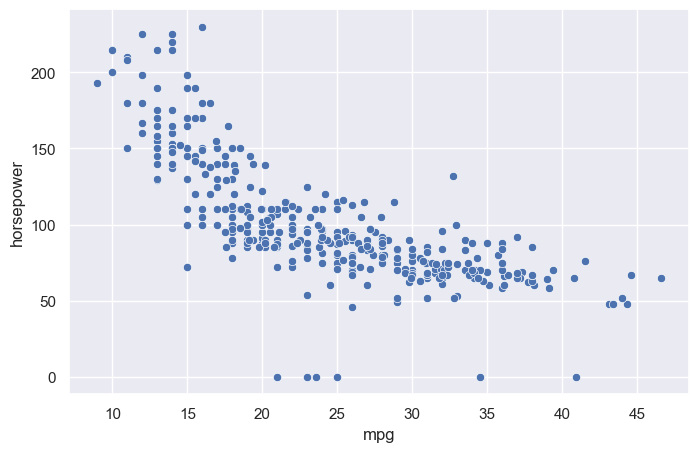

In [102]:
# miles per gallon according to horsepower
sns.scatterplot(data=df, x="mpg", y="horsepower")
sns.set(rc={"figure.figsize":(8,5)})

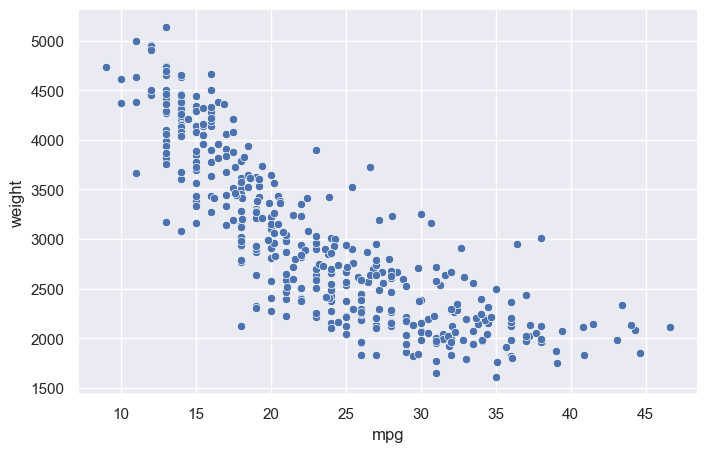

In [103]:
# miles per gallon according to weight and it seems like miles per gallon is inversely proportional to other columns
sns.scatterplot(data=df, x="mpg", y="weight")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find with increase in horse power , does acceleration increase or decrease?
#### Visualization shows that horse power and acceleration is on an average.
#### Visualization shows that cars from USA have more horsepower than others.

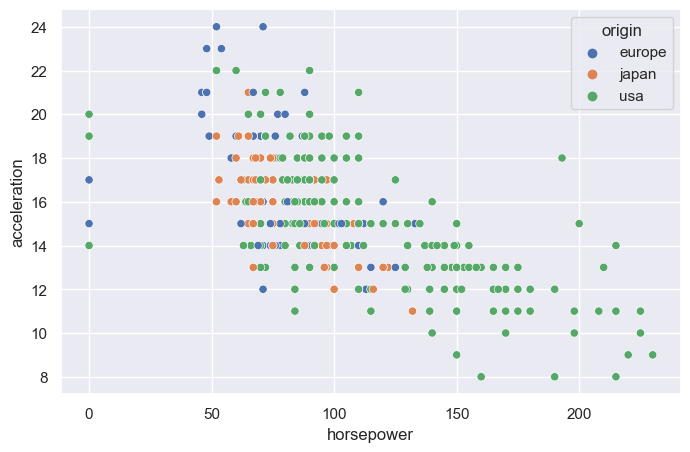

In [104]:
# Relation of horse power with acceleration
sns.scatterplot(data=df, x="horsepower", y="acceleration", hue="origin")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find horsepower relation with displacement?
#### Visualization shows that cars from USA have more horsepower and displacement relationship.
#### Japan and Europe cars have an average horsepower and displacement relationship.

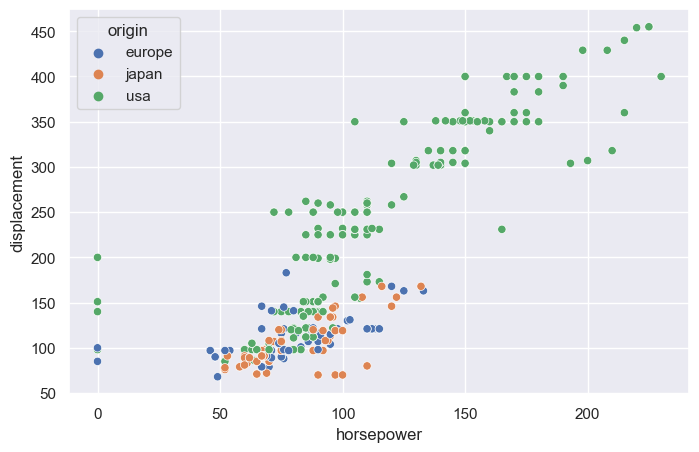

In [105]:
# Relation of horse power with displacement
sns.scatterplot(data=df, x="horsepower", y="displacement", hue="origin")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find relation of acceleration with displacement?
#### Visualization is same as horsepower and displacement.

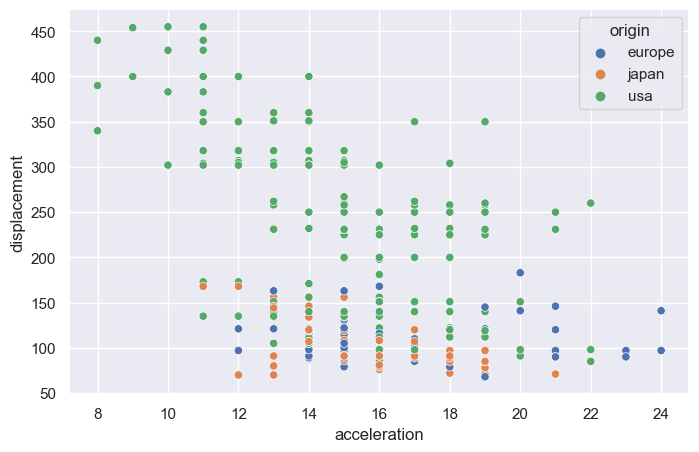

In [106]:
# Relation of acceleration with displacement
sns.scatterplot(data=df, x="acceleration", y="displacement", hue="origin")
sns.set(rc={"figure.figsize":(8,5)})

#### Question: Find the region with highest horse power of cars?
#### Visualization shows that USA cars have highest horsepower as compared to Europe and Japan.

<Axes: xlabel='name'>

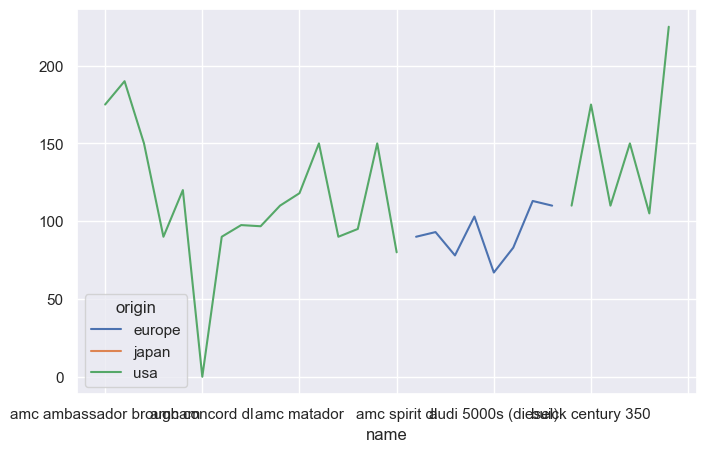

In [107]:
# the region with highest horse power of cars
df.pivot_table(index="name", columns="origin", values="horsepower").head(30).plot(kind="line")

#### Question: Find the region with highest acceleration of cars?
#### Visualization shows that USA cars have highest acceleration as compared to Europe and Japan.

Text(0.5, 1.0, 'Comparison between Acceleration, Cars and Region/Origin')

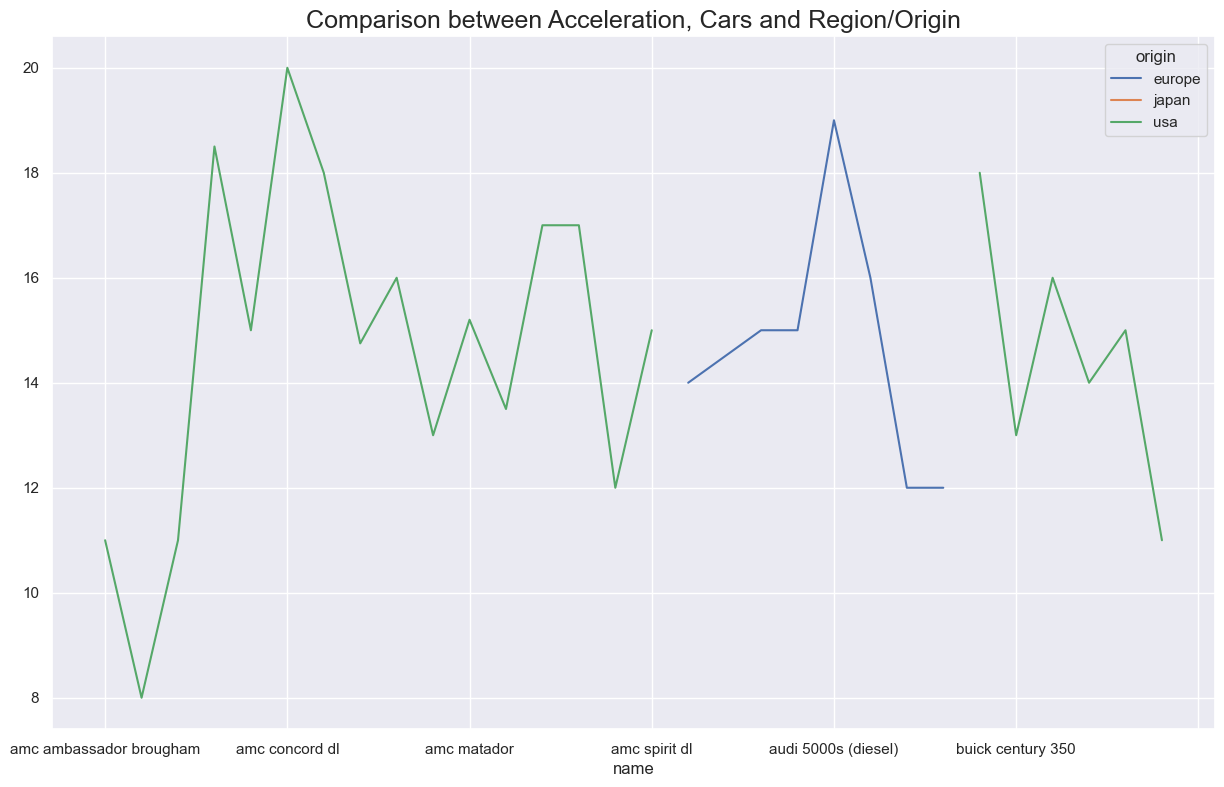

In [128]:
# the region with highest acceleration of cars
df.pivot_table(index="name", columns="origin", values="acceleration").head(30).plot(kind="line")
plt.title("Comparison between Acceleration, Cars and Region/Origin",fontsize=18)

####  Question: Find the region with highest miles per gallon of cars?
#### Visualization shows that USA and Europian cars have highest miles per gallon as compared to Japan.

Text(0.5, 1.0, 'Comparison between Mpg, Cars and Region/Origin')

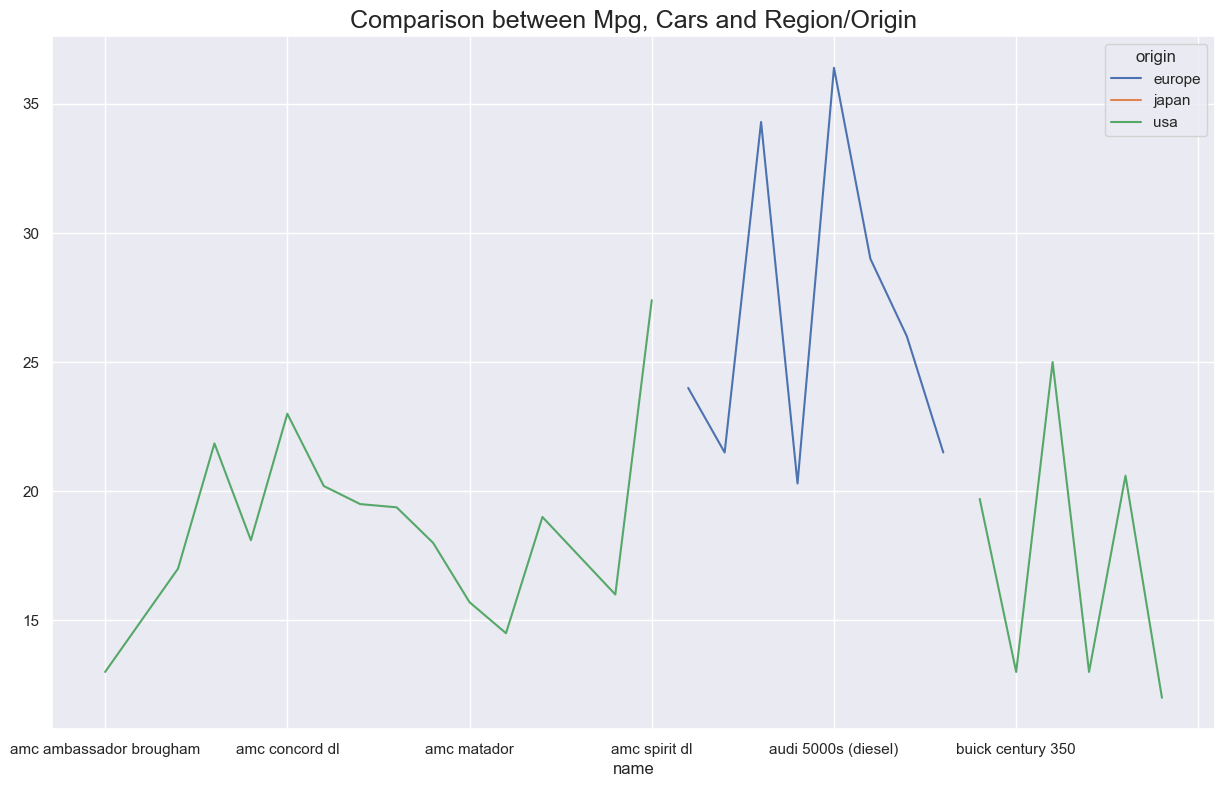

In [127]:
# the region with highest mpg of cars
df.pivot_table(index="name", columns="origin", values="mpg").head(30).plot(kind="line")
plt.title("Comparison between Mpg, Cars and Region/Origin",fontsize=18)

In [110]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10,70,usa


## Multi-variate Data Analysis ( Analysis of more than two columns )

#### Question: Find top 5 cars with highest horse power according to origin?
#### See the Visualization and Analysis given.

In [111]:
# top 5 cars with highest horse power according to origin
df.groupby(["name", "origin"])["horsepower"].max().sort_values(ascending=False).head(5)

name                      origin
pontiac grand prix        usa       230.0
buick electra 225 custom  usa       225.0
buick estate wagon (sw)   usa       225.0
pontiac catalina          usa       225.0
chevrolet impala          usa       220.0
Name: horsepower, dtype: float32

#### Question: Find top 5 cars with highest horsepower according to origin/region?
#### See Visualization

Text(0.5, 1.0, 'Comparison between Horsepower, Cars and Region/Origin')

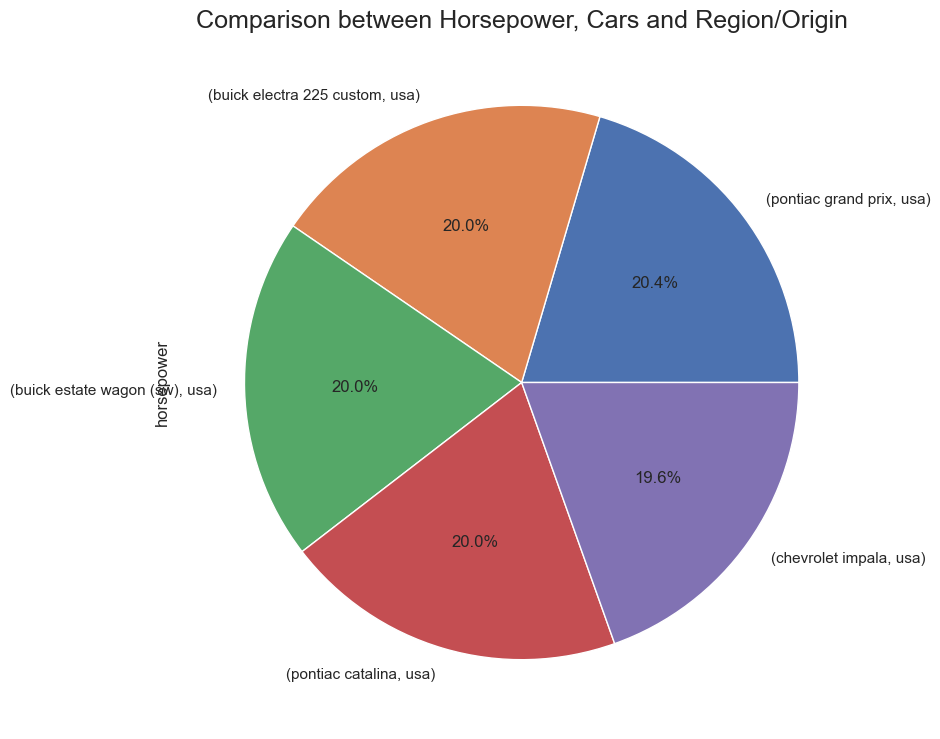

In [126]:
# Visualization of top 5 cars with highest horse power according to origin
df.groupby(["name", "origin"])["horsepower"].max().sort_values(ascending=False).head(5).plot(kind="pie", autopct="%0.1f%%")
plt.title("Comparison between Horsepower, Cars and Region/Origin",fontsize=18)

#### Question: Does increase in weight of piston, containing more cylinders affect acceleration and does increase in weight of piston also causes increase in cylinders?
#### See the Visualization of Scatterplot to find answer.

Text(0.5, 1.0, 'Comparison between Acceleration, Mpg, Cylinders and Weight')

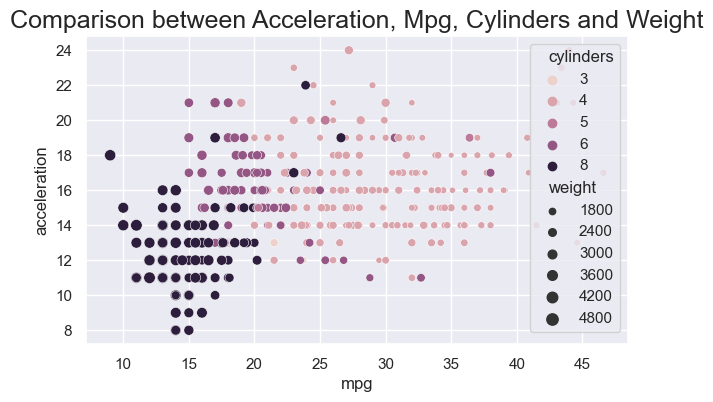

In [125]:
# increase in weight of piston, containing more cylinders affect acceleration and does increase in weight of piston also causes increase in cylinders
sns.scatterplot(data=df, x="mpg", y="acceleration", hue="cylinders", size="weight")
sns.set(rc={"figure.figsize":(15,9)})
plt.title("Comparison between Acceleration, Mpg, Cylinders and Weight",fontsize=18)

In [114]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10,70,usa


#### Question: Find top 5 cars with highest acceleration according to origin/region?
#### See Visualization

Text(0.5, 1.0, 'Comparison between Aceeleration, Cars and Region/Origin')

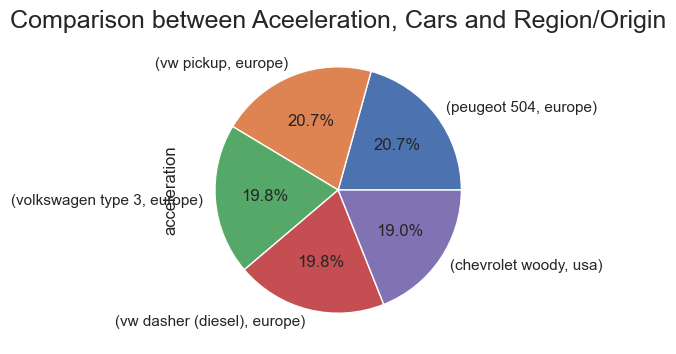

In [124]:
# top 5 cars with highest acceleration according to origin/region
df.groupby(["name", "origin"])["acceleration"].max().sort_values(ascending=False).head().plot(kind="pie",autopct="%0.1f%%")
sns.set(rc={"figure.figsize":(7,4)})
plt.title("Comparison between Aceeleration, Cars and Region/Origin",fontsize=18)

#### Question: Find top 5 cars with highest miles per gallon according to origin/region?
#### See Visualization 

Text(0.5, 1.0, 'Comparison between Mpg, Cars and Region/Origin')

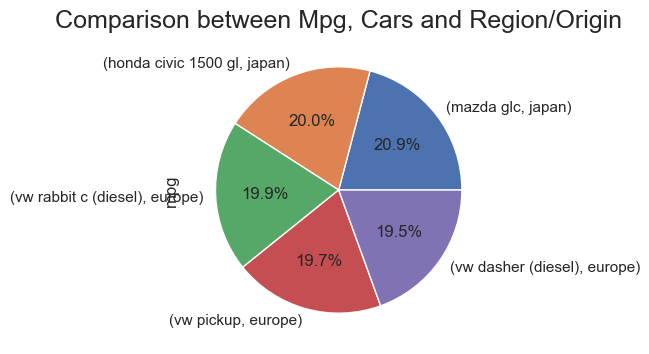

In [123]:
# top 5 cars with highest miles per gallon according to origin/region
df.groupby(["name", "origin"])["mpg"].max().sort_values(ascending=False).head().plot(kind="pie",autopct="%0.1f%%")
plt.title("Comparison between Mpg, Cars and Region/Origin",fontsize=18)

#### Question: Find top 5 cars with highest displacement according to origin/region?
#### See Visualization

Text(0.5, 1.0, 'Comparison between Displacement, Cars and Region/Origin')

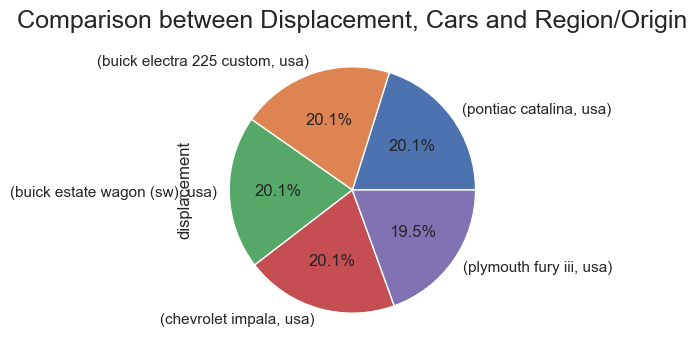

In [122]:
# top 5 cars with highest displacement according to origin/region
df.groupby(["name", "origin"])["displacement"].max().sort_values(ascending=False).head().plot(kind="pie",autopct="%0.1f%%")
plt.title("Comparison between Displacement, Cars and Region/Origin",fontsize=18)

#### Question: Find top 5 cars with highest weight according to origin/region?
#### See Visualization 

Text(0.5, 1.0, 'Comparison between Weight, Cars and Region/Origin')

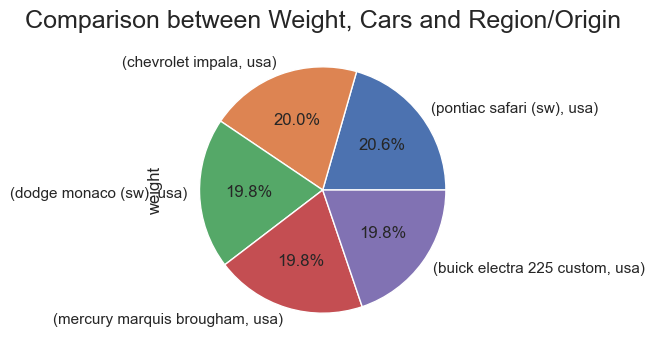

In [120]:
# top 5 cars with highest weight according to origin/region
df.groupby(["name", "origin"])["weight"].max().sort_values(ascending=False).head().plot(kind="pie",autopct="%0.1f%%")
plt.title("Comparison between Weight, Cars and Region/Origin",fontsize=18)

#### Question: Find top 5 cars with minimum/lowest weight  according to origin/region?
#### See Visualization 

Text(0.5, 1.0, 'Comparison between Weight, Cars and Region/Origin')

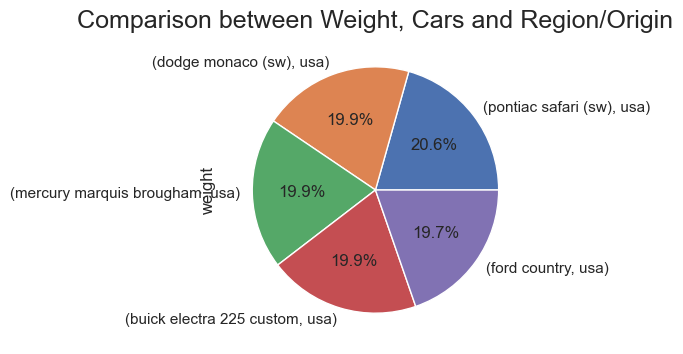

In [119]:
# top 5 cars with highest weight according to origin/region
df.groupby(["name", "origin"])["weight"].min().sort_values(ascending=False).head().plot(kind="pie",autopct="%0.1f%%")
plt.title("Comparison between Weight, Cars and Region/Origin",fontsize=18)